In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-09-02 04:27:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  22.4MB/s    in 14s     

2020-09-02 04:27:59 (22.4 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [20]:
import zipfile,os


In [21]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [22]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4
)

In [28]:
train_generator = train_datagen.flow_from_directory(
base_dir,
target_size=(150,150),
shuffle=True,
subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

In [31]:
model.fit(
    train_generator,
    steps_per_epoch=22,
    epochs=12,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=2
)

Epoch 1/12
22/22 - 19s - loss: 1.1624 - accuracy: 0.4065 - val_loss: 1.0028 - val_accuracy: 0.5365
Epoch 2/12
22/22 - 20s - loss: 0.7801 - accuracy: 0.6832 - val_loss: 0.5678 - val_accuracy: 0.7708
Epoch 3/12
22/22 - 20s - loss: 0.4595 - accuracy: 0.8338 - val_loss: 0.5268 - val_accuracy: 0.8177
Epoch 4/12
22/22 - 20s - loss: 0.3606 - accuracy: 0.8750 - val_loss: 0.4387 - val_accuracy: 0.8438
Epoch 5/12
22/22 - 19s - loss: 0.3264 - accuracy: 0.8783 - val_loss: 0.3763 - val_accuracy: 0.9010
Epoch 6/12
22/22 - 20s - loss: 0.2768 - accuracy: 0.9048 - val_loss: 0.2431 - val_accuracy: 0.9271
Epoch 7/12
22/22 - 20s - loss: 0.2362 - accuracy: 0.9176 - val_loss: 0.2298 - val_accuracy: 0.9115
Epoch 8/12
22/22 - 19s - loss: 0.1800 - accuracy: 0.9347 - val_loss: 0.1890 - val_accuracy: 0.9427
Epoch 9/12
22/22 - 19s - loss: 0.1965 - accuracy: 0.9421 - val_loss: 0.1642 - val_accuracy: 0.9531
Epoch 10/12
22/22 - 20s - loss: 0.1563 - accuracy: 0.9347 - val_loss: 0.2215 - val_accuracy: 0.9479
Epoch 11/

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Saving photo6228581149576374993.jpg to photo6228581149576374993.jpg
photo6228581149576374993.jpg
scissors


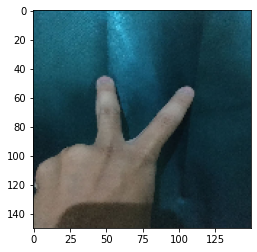

In [35]:
upl = files.upload()
for ndukun in upl.keys():

  path = ndukun
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(ndukun)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print("gkro")